In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

In [2]:
url = "https://raw.githubusercontent.com/Anasuya-Sahoo/DMDW-Lab/main/student-mat.csv"
df = pd.read_csv(url)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 1.  Dissimilarities matrix of nominal attributes

In [3]:
nominal = df[['Mjob','Fjob','reason','guardian']]
nominal.head()

,Mjob,Fjob,reason,guardian
0,at_home,teacher,course,mother
1,at_home,other,course,father
2,at_home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [4]:
nominal = nominal.replace('at_home','home')
nominal.head()

,Mjob,Fjob,reason,guardian
0,home,teacher,course,mother
1,home,other,course,father
2,home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [5]:
nominal = nominal.astype('category')
type(nominal)

pandas.core.frame.DataFrame

In [6]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [7]:
nominal['guardian'] = lb.fit_transform(nominal['guardian'])
nominal['Mjob'] = lb.fit_transform(nominal['Mjob'])
nominal['Fjob'] = lb.fit_transform(nominal['Fjob'])
nominal['reason'] = lb.fit_transform(nominal['reason'])

In [8]:
nominal.head()

,Mjob,Fjob,reason,guardian
0,1,4,0,1
1,1,2,0,0
2,1,2,2,1
3,0,3,1,1
4,2,2,1,0


In [9]:
nom1 = np.array(nominal)
nom1.reshape(-1,2)
nom1.shape

(395, 4)

In [10]:
nom2 = np.array(nominal)
nom2.reshape(-1,2)
nom2.shape

(395, 4)

In [11]:
dist_matrix = distance.cdist(nom1,nom2)
dist_matrix

array([[0.        , 2.23606798, 2.82842712, ..., 2.44948974, 2.82842712,
        3.31662479],
       [2.23606798, 0.        , 2.23606798, ..., 2.23606798, 2.23606798,
        1.41421356],
       [2.82842712, 2.23606798, 0.        , ..., 2.44948974, 2.82842712,
        2.64575131],
       ...,
       [2.44948974, 2.23606798, 2.44948974, ..., 0.        , 1.41421356,
        2.23606798],
       [2.82842712, 2.23606798, 2.82842712, ..., 1.41421356, 0.        ,
        1.73205081],
       [3.31662479, 1.41421356, 2.64575131, ..., 2.23606798, 1.73205081,
        0.        ]])

### 2. Dissimilarities matrix of numerical attributes

In [12]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [13]:
numerical = df[['age','Medu','Fedu','traveltime','studytime','failures']]
numerical.head()

,age,Medu,Fedu,traveltime,studytime,failures
0,18,4,4,2,2,0
1,17,1,1,1,2,0
2,15,1,1,1,2,3
3,15,4,2,1,3,0
4,16,3,3,1,2,0


In [14]:
num1 = np.array(numerical[['age','failures']])
num1.reshape(-1,2)
num1.shape

(395, 2)

In [15]:
num2 = np.array(numerical[['Fedu','Medu']])
num2.reshape(-1,2)
num2.shape

(395, 2)

In [16]:
dist_matrix1 = distance.cdist(num1,num2)
dist_matrix1

array([[14.56021978, 17.02938637, 17.02938637, ..., 17.02938637,
        16.2788206 , 17.02938637],
       [13.60147051, 16.03121954, 16.03121954, ..., 16.03121954,
        15.29705854, 16.03121954],
       [11.04536102, 14.14213562, 14.14213562, ..., 14.14213562,
        13.        , 14.14213562],
       ...,
       [17.02938637, 20.09975124, 20.09975124, ..., 20.09975124,
        19.        , 20.09975124],
       [14.56021978, 17.02938637, 17.02938637, ..., 17.02938637,
        16.2788206 , 17.02938637],
       [15.5241747 , 18.02775638, 18.02775638, ..., 18.02775638,
        17.2626765 , 18.02775638]])

### 3. Dissimilarities matrix of binary attributes

In [17]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [18]:
binary = df[['schoolsup','famsup','paid','activities','nursery','internet','higher','romantic']]
binary.head()

,schoolsup,famsup,paid,activities,nursery,internet,higher,romantic
0,yes,no,no,no,yes,no,yes,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,yes,no,yes,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,no,yes,no


In [19]:
binary = binary.replace('no',0)
binary = binary.replace('yes',1)
binary.head()

,schoolsup,famsup,paid,activities,nursery,internet,higher,romantic
0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,0,1,0


In [20]:
num1 = np.array(binary[['schoolsup','famsup']])
num1 = num1.reshape(-1,2)
num1.shape

(395, 2)

In [21]:
num2 = np.array(binary[['schoolsup','famsup']])
num2 = num2.reshape(-1,2)
num2.shape

(395, 2)

In [22]:
dist_matrix2 = distance.cdist(num1,num2)
dist_matrix2.shape

(395, 395)

In [23]:
dist_matrix2

array([[0.        , 1.41421356, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.41421356, 0.        , 1.41421356, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 1.41421356, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

# Correlation

In [24]:
dfn=df[['traveltime','studytime']]
dfn.head()

,traveltime,studytime
0,2,2
1,1,2
2,1,2
3,1,3
4,1,2


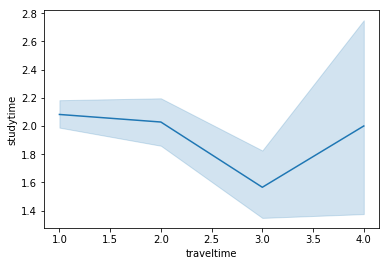

In [26]:
x=dfn['traveltime']
y=dfn['studytime']
sns.lineplot(x,y,dashes=True)
plt.show()

            traveltime  studytime
traveltime    1.000000  -0.100909
studytime    -0.100909   1.000000


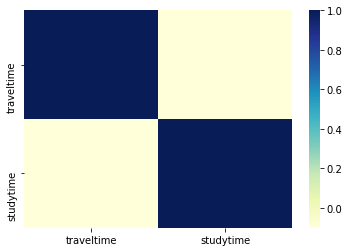

In [27]:
from scipy.stats import norm
corelation=dfn.corr()
print(corelation)
sns.heatmap(corelation,cmap="YlGnBu")
plt.show()

# COVARIANCE analysis

            traveltime  studytime
traveltime    0.486513  -0.059070
studytime    -0.059070   0.704324


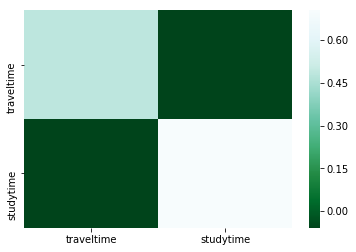

In [29]:
covar=dfn.cov()
print(covar)
sns.heatmap(covar,cmap='BuGn_r')
plt.show()

# Normalization

In [30]:
age=np.array(df['age'])
print('MAX AGE',max(age))
print('MIN AGE',min(age))
age=age.reshape(395,1)

MAX AGE 22
MIN AGE 15


In [33]:
#z-normalization
from scipy import stats
zscore=np.array(stats.zscore(age))
zscore=zscore[0:394]
zscore=zscore.reshape(2,197)
zscore

array([[ 1.02304645,  0.23837976, -1.33095364, -1.33095364, -0.54628694,
        -0.54628694, -0.54628694,  0.23837976, -1.33095364, -1.33095364,
        -1.33095364, -1.33095364, -1.33095364, -1.33095364, -1.33095364,
        -0.54628694, -0.54628694, -0.54628694,  0.23837976, -0.54628694,
        -1.33095364, -1.33095364, -0.54628694, -0.54628694, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -0.54628694, -0.54628694,
        -1.33095364, -1.33095364, -1.33095364, -1.33095364, -0.54628694,
        -1.33095364, -1.33095364, -0.54628694, -1.33095364, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -1.33095364, -0.54628694,
        -1.33095364, -0.54628694, -0.54628694, -1.33095364, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -1.33095364, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -1.33095364, -0.54628694,
        -0.54628694, -0.54628694, -0.54628694, -0.54628694, -1.33095364,
        -0.54628694, -1.33095364, -0.54628694, -1.3

In [34]:
#Normalization by decimal scaling
result=[]
result.append(age/pow(10,2))
result=np.array(result)
result

array([[[0.18],
        [0.17],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.16],
        [0.17],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.16],
        [0.17],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.16],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.16],
        

In [35]:
#min-max narmalizaion
minv=min(age)
maxv=max(age)
d=maxv-minv

In [36]:
result=[]
result.append((age-minv)/d)

In [37]:
result=np.array(result)
result

array([[[0.42857143],
        [0.28571429],
        [0.        ],
        [0.        ],
        [0.14285714],
        [0.14285714],
        [0.14285714],
        [0.28571429],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.14285714],
        [0.14285714],
        [0.14285714],
        [0.28571429],
        [0.14285714],
        [0.        ],
        [0.        ],
        [0.14285714],
        [0.14285714],
        [0.        ],
        [0.14285714],
        [0.        ],
        [0.        ],
        [0.14285714],
        [0.14285714],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.14285714],
        [0.        ],
        [0.        ],
        [0.14285714],
        [0.        ],
        [0.        ],
        [0.14285714],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.14285714],
        [0